In [1]:
# Importing Libraries 
# Loading Dataset
# Data Cleaning 
# Exploratory Data Analysis 
# Sentimental Data Analysis 
# Conclusion 

In [2]:
!pip install nltk 
!pip install wordcloud 
!pip install textblob


In [3]:
import re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 
import plotly.express as px

# to avoid warnings 
import warnings 
warnings.filterwarnings('ignore')

# Importing Database 

In [4]:
trump = pd.read_csv('hashtag_donaldtrump.csv', lineterminator = '\n')
print(trump.head(3))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,.

In [5]:
biden = pd.read_csv("hashtag_joebiden.csv", lineterminator = '\n')
print(biden.head(2))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Twitter for iPad  809904438.0         Cheri A. 🇺🇸     Biloximeemaw   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1               6628.0                           NaN       NaN       NaN   

   city    

In [6]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [7]:
# Getting trump database information. 
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [8]:
# Getting biden database info. 
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

# Data Processing

In [9]:
# Creating a new column called Candidate to differentiate between trump and biden.
trump['Candidate'] = 'trump'

# biden DataFrame. 
biden['Candidate'] = 'biden'

# Combining the DataFrame. 
data = pd.concat([trump, biden])

# final Data shape.
print('Final data shape : ', data.shape)

# View the first 2 rows 
print('\nFrist 2 rows :')
print(data.head(2))

Final data shape :  (1747805, 22)

Frist 2 rows :
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   

                  user_location       lat      long  city  \
0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   NaN   
1                           NaN       NaN       NaN   NaN   

      

# Data Cleaning

In [10]:
# Droping null values if they are exists.
data.dropna(inplace = True)

In [11]:
data['country'].value_counts()

country
United States of America    182382
United Kingdom               31869
India                        20931
France                       19996
Germany                      18534
Canada                       16250
The Netherlands               8491
Australia                     8330
Spain                         5254
Brazil                        4211
Pakistan                      3704
Italy                         2966
Ireland                       2587
Bangladesh                    2036
Mexico                        1972
Belgium                       1962
Nigeria                       1848
South Africa                  1648
United Arab Emirates          1521
Switzerland                   1494
Peru                          1031
Lebanon                       1002
Argentina                      872
Ecuador                        824
Colombia                       565
Honduras                       508
Venezuela                      431
New Zealand                    384
Poland      

In [12]:
# providing a common ground of concideration united states and united states of america as US.
data['country'] = data['country'].replace({'United States of America' : "US", 'United States' : "US"})


# Exploratory Data Analysis

In [13]:
# Group the data by Candidate and count the number of tweets for each candidate. 
tweets_count = data.groupby('Candidate')['tweet'].count().reset_index()

# Interactive Bar chart
fig = px.bar(tweets_count, x = 'Candidate', y = 'tweet', color = 'Candidate', 
color_discrete_map = {'Trump' : 'pink', 'Biden' : 'blue'}, 
labels = {'Candidate': "Candidate", 'tweet' : 'Number of Tweets'},
title = 'Tweets for Candidates')

# Show fig
fig.show()

Interpretation : Upon studing the graph, we can say that Donald Trump is most tweeted by general public as compare to Joe Biden. 

In [14]:
# Interactive Bar chart
likes_comparison = data.groupby('Candidate')['likes'].sum().reset_index()
fig = px.bar(likes_comparison, x = 'Candidate', y = 'likes', color = 'Candidate',
color_discrete_map = {'Trump' : 'blue', 'Biden' : 'green'},
labels = {'Candidate' : 'Candidate', 'likes' : 'Total Likes'}, 
title = 'Comparison of Likes')

# Update layout with the black theme. 
fig.update_layout(plot_bgcolor = 'black',
paper_bgcolor = 'black', font_color = 'white')

# show the graph 
fig.show()

Interpretation : The public has tweeted the most about the Donald Trump however the number of likes are high for Joe Biden which definitly indicates liking towards Biden.


**Top 10 contry wise tweets count.**


In [15]:
# Top 10 country wise tweets count 
top_countries_10 = data.groupby('country')['tweet'].count().sort_values(ascending = False).reset_index().head(10)

# Interactive bar graph 
fig = px.bar(top_countries_10, x = 'country', y = 'tweet', template = 'plotly_dark',
color_discrete_sequence = px.colors.qualitative.Dark24_r,
title = 'Top 10 Contries tweet analysis')

# To view the graph 
fig.show()

Interpretation : All countries are tweeting the most about Donald Trump. However, India is talking more about Joe Biden.


In [16]:
# The number of tweets done for each candidate by all the contries. 
tweet_df = data.groupby(['country', 'Candidate'])['tweet'].count().reset_index()

# Candidate for top 10 countries tweets.
tweeters = tweet_df[tweet_df['country'].isin(top_countries_10.country)]

# plot for each count from candidates 
fig = px.bar(tweeters, x = 'country', y = 'tweet', color = 'Candidate', 
labels = {'country' : 'Country', 'tweet' : 'Number of Tweets', 'Candidate' : 'Candidate'}, 
title = 'Tweets count for each candidate',
template = 'plotly_dark',
barmode = 'group')

# view the graph 
fig.show()



Interpretation: All the countries are tweeting the most about Trump. However, India is talking more about Joe Biden.




**Sentiment Analysis for prediction of election results**

In [17]:
def clean(text): 
    # Remove URLs 
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text)) 

    # Convert text to lowercase 
    text = text.lower() 

    # Replace anything other than alphabets a-z with a space 
    text = re.sub('[^a-z]', ' ', text) 

    # Split the text into single words 
    text = text.split() 

    # Initialize WordNetLemmatizer 
    lm = WordNetLemmatizer() 

    # Lemmatize words and remove stopwords 
    text = [lm.lemmatize(word) for word in text if word not in set( 
    stopwords.words('english'))] 

    # Join the words back into a sentence 
    text = ' '.join(word for word in text) 

    return text 



**Get polarity, subjectivity, and Analysis**: Now, let’s create a function to get polarity, subjectivity, and Analysis function to fetch sentiments from the data.


In [18]:
def getpolarity(text): 
    return TextBlob(text).sentiment.polarity 

def getsubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity 

def getAnalysis(score): 
    if score < 0: 
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'positive'

**Donald Trump tweet sentiment analysis**

Note: We are considering the data of only, the United States of America because that will be a major factor in predicting the results.

In [19]:
trump_tweets = data[data['Candidate'] == 'trump'] 

# taking only U.S. country data 
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US'] 
trump_tweets = trump_tweets[['tweet']] 
print(trump_tweets.head()) 

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


In [20]:
# Now, we apply the clean function to get cleaned text from tweets.

trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean) 
print(trump_tweets.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


In [21]:
# Now, obtaining subjectivity for Trump’s tweets.

trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity) 

**Polarity** : It represents the float values lies between -1 and 1
    

In [22]:


trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity) 



In [23]:
# Now, classifying the sentiments as positive, negative or neutral.

trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis) 
trump_tweets.head() 



tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  subjectivity  polarity  \
2   trump student used hear year ten year heard ch...      0.333333  0.333333   
4                    get tie get tie trump rally iowa      0.000000  0.000000   
11  nypost censorship censored twitter manipulate ...      0.678571 -0.148810   
12  trump presidenttrump trump landslidevictory tr...      0.750000  0.500000   
22  trump nobody like tell farmer better way worki...      0.595238  0.261905   

    analysis  
2   positive  
4    neutral  
11  negative  
12  positive  
22  positive

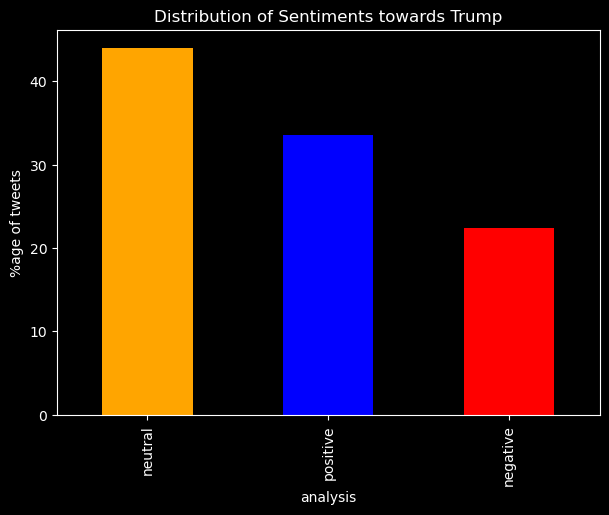

In [24]:


# how much data is positive/negetive/neutral 
plt.style.use('dark_background') # Adding black theme 

# Define colors for each bar 
colors = ['orange', 'blue', 'red'] 

plt.figure(figsize=(7, 5)) 
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Trump") 
plt.show() 



Now, plotting Word Cloud to quickly identify the most important themes or topics in the text and understand the overall sentiment or tone of the tweets.


In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

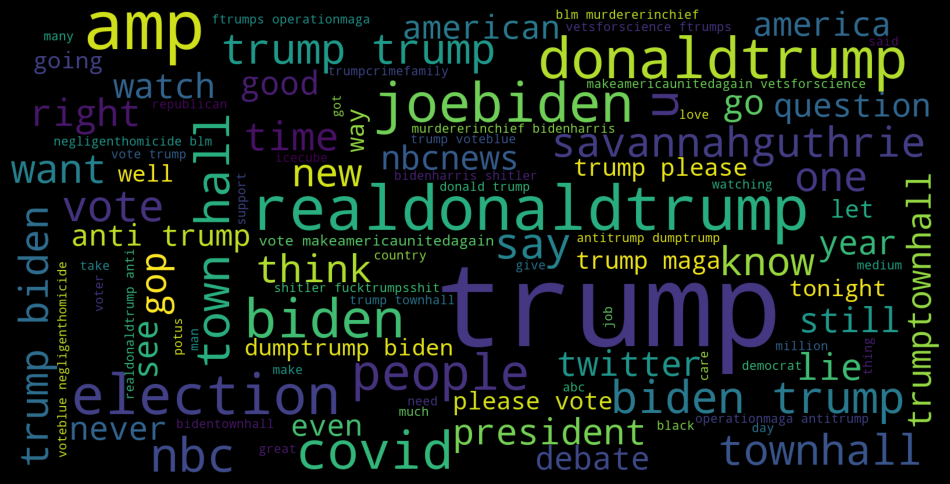

In [26]:
def word_cloud(wd_list): 
    stopwords = set(STOPWORDS) 
    all_words = ' '.join([text for text in wd_list]) 
    wordcloud = WordCloud(background_color='black', 
                        stopwords=stopwords, 
                        width=1600, height=800, max_words=100, max_font_size=200, 
                        colormap="viridis").generate(all_words) 
    plt.figure(figsize=(12, 10)) 
    plt.axis('off') 
    plt.imshow(wordcloud) 

word_cloud(trump_tweets['cleantext'][:5000]) 

**Joe Biden’s Twitter sentiment analysis**

In [28]:
biden_tweets = data[data['Candidate'] == 'biden'] 
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US'] 
biden_tweets = biden_tweets[['tweet']] 
biden_tweets

tweet
6       In 2020, #NYPost is being #censorship #CENSORE...
17      Comments on this? "Do Democrats Understand how...
25      @RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29      Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34      #realDonaldTrump addresses #JoeBiden and #Hunt...
...                                                   ...
776836  #Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA.  | ...
776845  Will #criticalRaceTheory become ubiquitous in ...
776847   You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861  #election #2020Elections #trump #biden https:/...
776865  @FLOTUS I’m excited to have a FLOTUS whose vag...

[85760 rows x 1 columns]

In [29]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean) 
biden_tweets.head()

tweet  \
6   In 2020, #NYPost is being #censorship #CENSORE...   
17  Comments on this? "Do Democrats Understand how...   
25  @RealJamesWoods #BidenCrimeFamily #JoeBiden #H...   
29  Come on @ABC PLEASE DO THE RIGHT THING. Move t...   
34  #realDonaldTrump addresses #JoeBiden and #Hunt...   

                                            cleantext  
6   nypost censorship censored twitter manipulate ...  
17  comment democrat understand ruthless china chi...  
25  realjameswoods bidencrimefamily joebiden hunte...  
29  come abc please right thing move biden town ha...  
34  realdonaldtrump address joebiden hunterbiden c...

In [30]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity) 
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity) 
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis) 
biden_tweets.head() 

tweet  \
6   In 2020, #NYPost is being #censorship #CENSORE...   
17  Comments on this? "Do Democrats Understand how...   
25  @RealJamesWoods #BidenCrimeFamily #JoeBiden #H...   
29  Come on @ABC PLEASE DO THE RIGHT THING. Move t...   
34  #realDonaldTrump addresses #JoeBiden and #Hunt...   

                                            cleantext  subjectivity  polarity  \
6   nypost censorship censored twitter manipulate ...      0.678571 -0.148810   
17  comment democrat understand ruthless china chi...      1.000000 -1.000000   
25  realjameswoods bidencrimefamily joebiden hunte...      0.000000  0.000000   
29  come abc please right thing move biden town ha...      0.178571  0.078571   
34  realdonaldtrump address joebiden hunterbiden c...      0.000000  0.000000   

    analysis  
6   negative  
17  negative  
25   neutral  
29  positive  
34   neutral

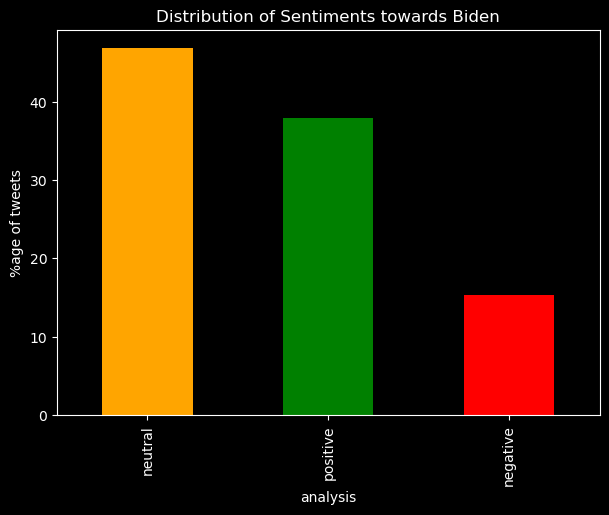

In [31]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') 

# Define colors for each bar 
colors = ['orange', 'green', 'red'] 

plt.figure(figsize=(7, 5)) 
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Biden") 
plt.show() 



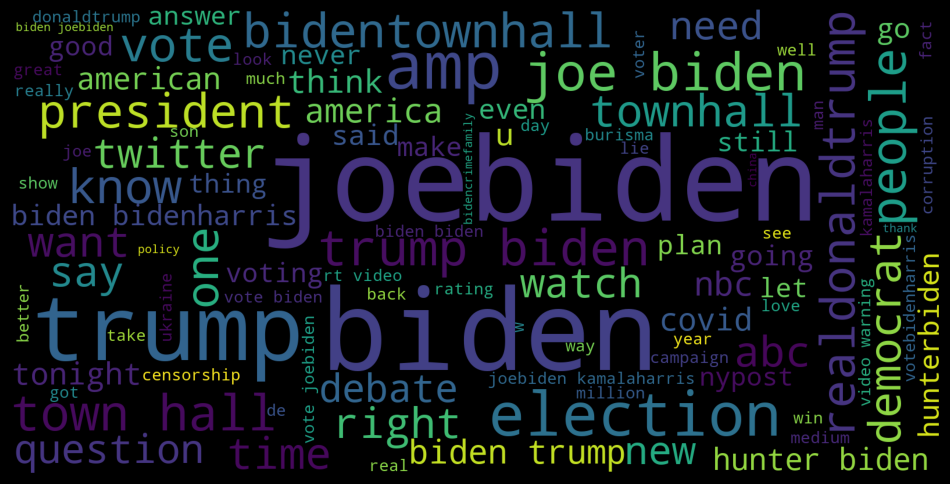

In [32]:
# Now, plotting the Word Cloud for the Joe Biden dataset.

word_cloud(biden_tweets['cleantext'][:5000])